### Loading necessary Libraries and Dataset :

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
data = pd.read_csv("hotel_booking.csv")

data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


### Data Preprocessing - Cleaning and Removing Outliers :

In [135]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [136]:
data.sort_values(by = 'arrival_date_year',ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482
38148,Resort Hotel,0,159,2017,July,27,7,1,2,2,...,Transient,99.60,0,0,Check-Out,2017-07-10,Eric Hodge,Eric_Hodge@yandex.com,625-338-5345,************8654
38130,Resort Hotel,0,81,2017,July,27,5,1,4,2,...,Transient,228.75,1,0,Check-Out,2017-07-10,Jeffrey Watson,Jeffrey_W@yahoo.com,294-070-8149,************1055
38131,Resort Hotel,0,310,2017,July,27,6,1,3,2,...,Transient,93.38,0,2,Check-Out,2017-07-10,Rebecca Beard,Rebecca_B56@aol.com,351-705-6795,************4849
38132,Resort Hotel,0,9,2017,July,27,7,1,2,2,...,Transient,160.00,0,2,Check-Out,2017-07-10,Julie Rogers,Julie_Rogers@aol.com,920-163-1835,************9797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44125,City Hotel,0,29,2015,September,40,30,0,2,1,...,Contract,90.25,0,2,Check-Out,2015-10-02,Natasha Rodriguez,NatashaRodriguez@aol.com,421-922-2145,************1572
44126,City Hotel,1,30,2015,September,40,30,0,2,2,...,Transient,121.00,0,0,Canceled,2015-09-15,Scott Rivera,Scott_Rivera@outlook.com,660-669-0848,************9753
44127,City Hotel,1,30,2015,September,40,30,0,2,2,...,Transient,121.00,0,0,Canceled,2015-09-15,Rachel Cox,Rachel.Cox28@gmail.com,292-212-2285,************8341
44128,City Hotel,1,27,2015,September,40,30,0,2,2,...,Transient,108.00,0,0,Canceled,2015-09-24,Joseph Becker,Joseph.B@outlook.com,694-633-9083,************1067


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [138]:
#Converting to date-time format:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [139]:
data.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [140]:
# Listing all columns of type 'object' and their respective values :

for column in data.describe(include = 'object').columns:
    print(column)
    print(data[column].unique())
    print()

hotel
['Resort Hotel' 'City Hotel']

arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 

In [141]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Removing unnecessary columns:

data.drop(['company','agent'], axis = 1, inplace = True)

In [148]:
data.dropna(inplace = True )

In [149]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [150]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Note: ADR is the Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)

In [152]:
# Removing outliers:

data = data[data['adr'] < 5000]

### Exploratory Data Analysis :

In [157]:
cancel_per = data['is_canceled'].value_counts(normalize = True)
cancel_per

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

Above stats shows that there are 37.1% cancelations (including both types of hotels)

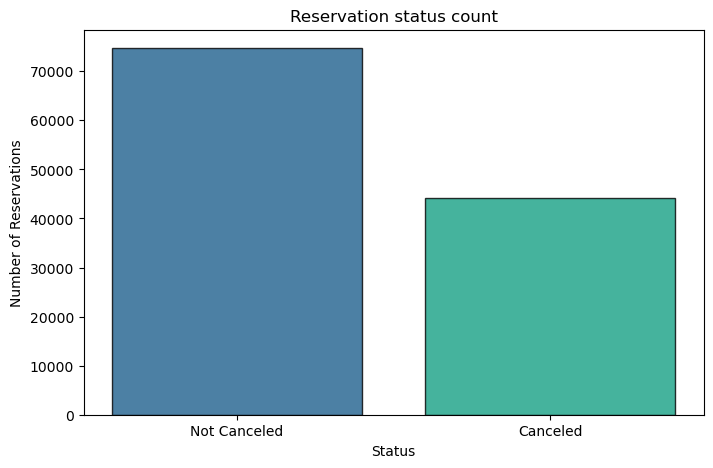

In [358]:
# Plotting bar plot:

plt.figure(figsize = (8,5))
plt.title("Reservation status count")
plt.xlabel("Status")
plt.ylabel("Number of Reservations")

plt.bar(['Not Canceled','Canceled'], data['is_canceled'].value_counts(), color=['#1F618D','#16A085'], edgecolor='k', alpha=0.8)
plt.show()

Note: This bar graph shows the frequency of canceled and not canceled reservations

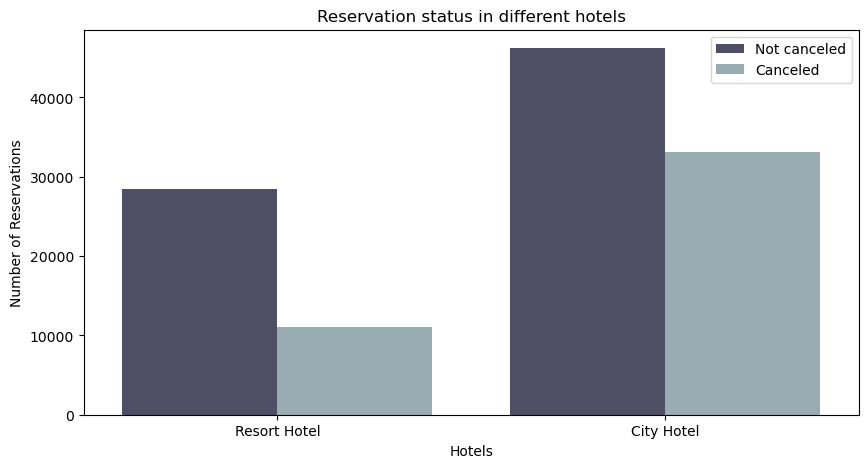

In [359]:
# Plotting count plot:

plt.figure(figsize = (10,5))
sns.countplot(x = 'hotel', hue = 'is_canceled', data = data, palette = 'bone')

plt.title("Reservation status in different hotels")
plt.xlabel("Hotels")
plt.ylabel("Number of Reservations")
plt.legend(["Not canceled","Canceled"])
plt.show()

Note: It is clearly visible that the cancelation rates of City Hotels are much higher than Resort Hotels

In [285]:
# Reservation cancelation percentage of Resort Hotels:

resort_h = data[data['hotel'] == 'Resort Hotel']
resort_h['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [286]:
# Reservation cancelation percentage of City Hotels:

city_h = data[data['hotel'] == 'City Hotel']
city_h['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [319]:
# Calculating mean of ADR based on reservation status dates:

resort_h = data[data['hotel'] == 'Resort Hotel'].groupby('reservation_status_date').mean(numeric_only = True)['adr']
city_h = data[data['hotel'] == 'City Hotel'].groupby('reservation_status_date').mean(numeric_only = True)['adr']

print(resort_h, city_h)

reservation_status_date
2014-11-18      0.000000
2015-01-01     61.966667
2015-01-02      9.633750
2015-01-18      0.000000
2015-01-21     37.301209
                 ...    
2017-09-08    101.012500
2017-09-09    147.778333
2017-09-10    145.272500
2017-09-12    153.570000
2017-09-14    105.930000
Name: adr, Length: 913, dtype: float64 reservation_status_date
2014-10-17     62.800000
2015-01-01     62.063158
2015-01-20     76.500000
2015-01-30     61.400000
2015-02-17     76.500000
                 ...    
2017-09-03    137.172600
2017-09-04    116.925385
2017-09-05    154.000000
2017-09-06     93.293333
2017-09-07    159.685000
Name: adr, Length: 864, dtype: float64


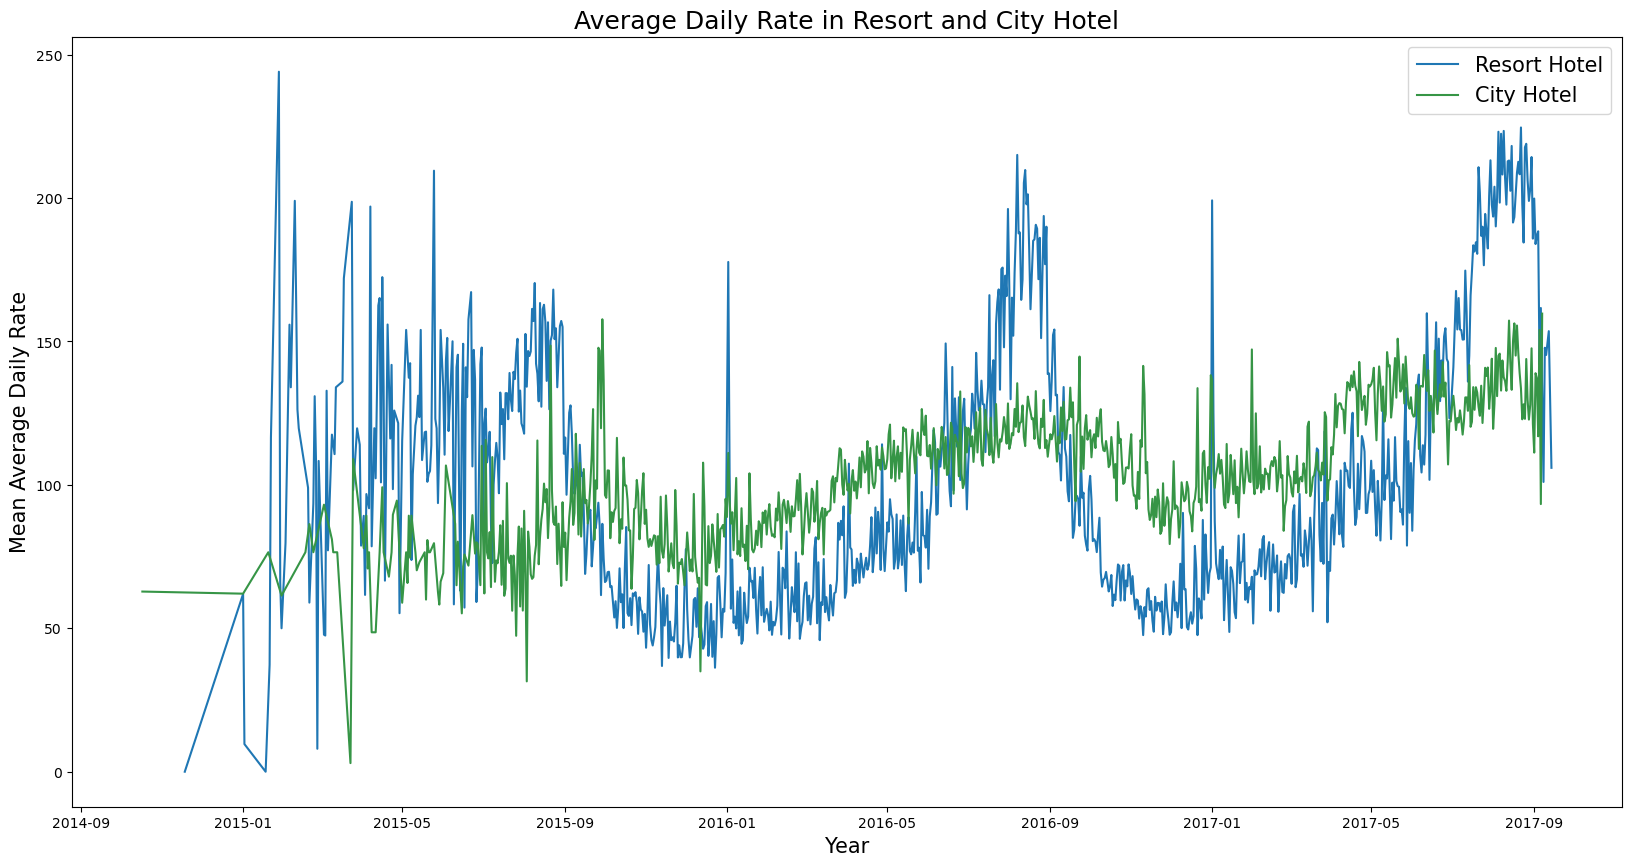

In [506]:
# Plotting line plots to show ADR trends of both type of hotels: 

plt.figure(figsize = (20,10))
plt.title("Average Daily Rate in Resort and City Hotel", fontsize = 18)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Mean Average Daily Rate", fontsize = 15)

plt.plot(resort_h.index, resort_h.values, label = 'Resort Hotel')
plt.plot(city_h.index, city_h.values, label = 'City Hotel', color = '#369546')

plt.legend(fontsize = 15)
plt.show()

By observing the graph, various inferences can be made :

• The mean average daily rate in city hotels are generally higher than that in resort hotels.<br>
• Both type of hotels experienced increase in average daily rates over the years.<br>
• Distribution of resort hotels has more highs and lows, this could be due to the higher price rates than city hotels.<br>
• The line representing ADR in city hotels is generally in the middle which shows the stable nature of ADR in city hotels. 

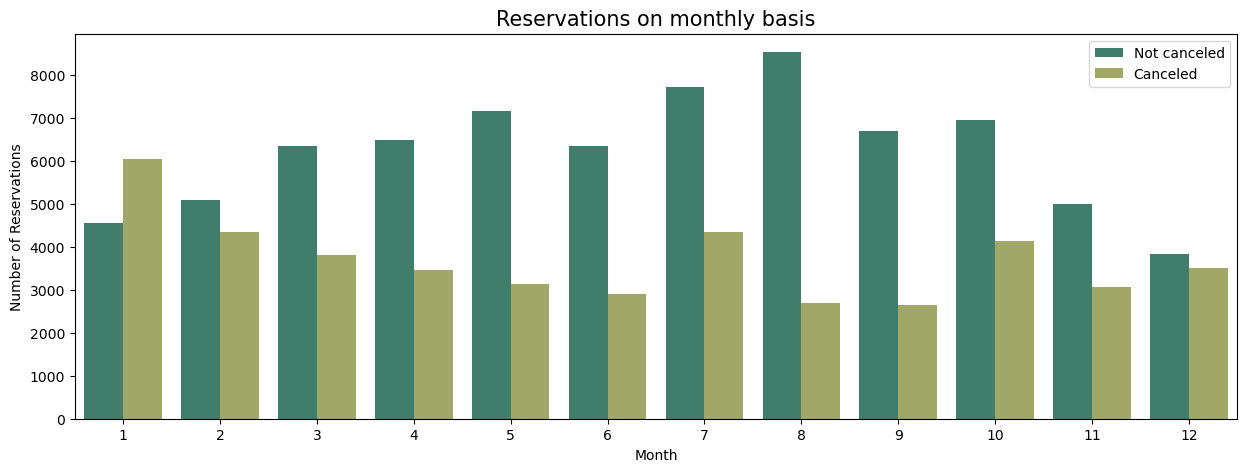

In [549]:
# Plotting count plots to show reservations done on monthly basis:


data['Month'] = data['reservation_status_date'].dt.month

plt.figure(figsize = (15,5))
plt.title("Reservations on monthly basis", fontsize = 15)
sns.countplot(x = 'Month', hue = 'is_canceled', data = data, palette = 'gist_earth')

plt.ylabel("Number of Reservations")
plt.legend(['Not canceled', 'Canceled'])
plt.show()

Inferences :

• Highest number of cancelations are in the month of January.<br>
• Lowest number of cancelations are in August and September.


In [564]:
data['country'].describe()

count     118897
unique       177
top          PRT
freq       48585
Name: country, dtype: object

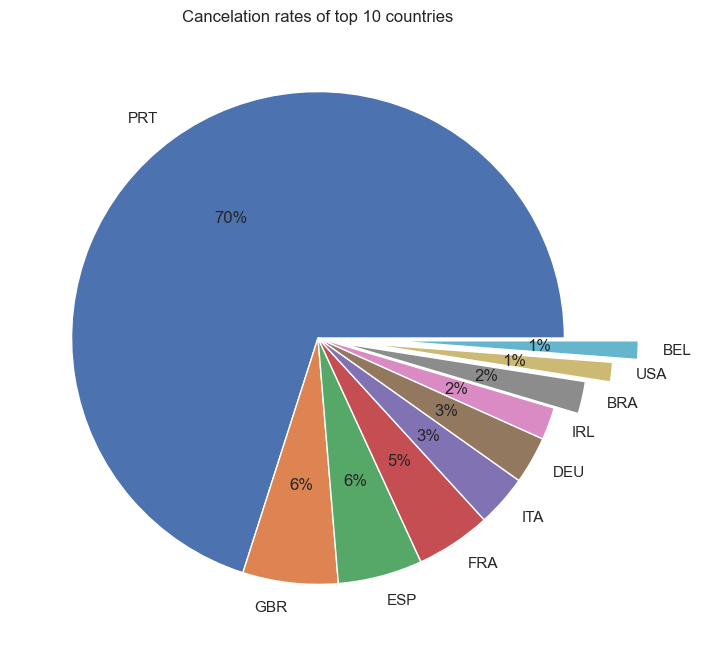

In [646]:
# Determining percentage of cancelations country-wise by examining top 10 countries:

plt.figure(figsize = (8,8))

plt.title("Cancelation rates of top 10 countries")
vals = data[data['is_canceled']==1]['country'].value_counts()[:10]
labels = data[data['is_canceled']==1]['country'].value_counts().index[:10]

plt.pie(vals, labels = labels, autopct = '%0.0f%%', explode = [0,0,0,0,0,0,0,0.1,0.2,0.3])

plt.show()

• Portugal has the highest number of cancelations.

In [588]:
data[data['is_canceled'] == 1]['country'].value_counts()[:10]

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

In [672]:
# Percentage of people coming from different agencies:

data['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [704]:
# Percentage of reservation cancelations coming from different agencies:

data[data['is_canceled'] == 1]['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

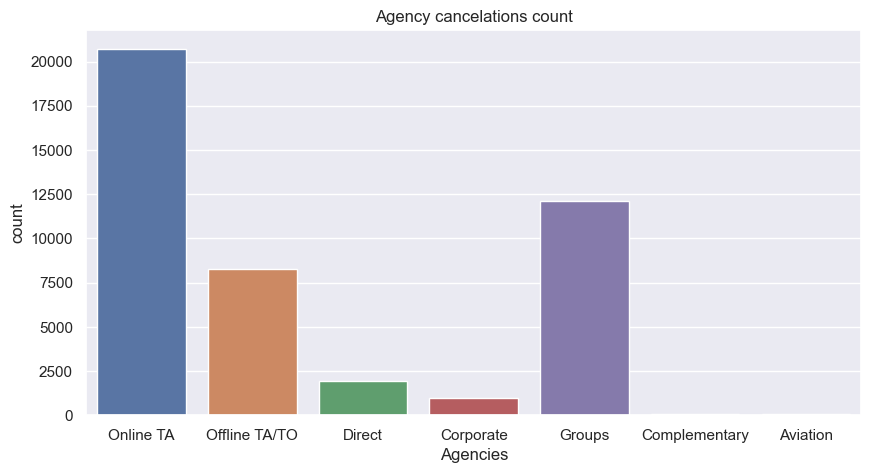

In [710]:
# Depiction of cancelations from different agencies:

plt.figure(figsize = (10,5))
plt.title("Agency cancelations count")
plt.xlabel("Agencies")

sns.countplot(x = data[data['is_canceled'] == 1]['market_segment'].values, data = data)

plt.show()

• Most cancelations are from Online Travel Agencies

## Conclusion:

• As the price rate directly affects the cancelation chances of reservations, hotels could work on their pricing strategies.<br>

• Hotels should give out promotional and vacational discounts for customer retention.<br>

• Provide better customer experience by mantaining good hygiene, service quality.<br>

• To promote their brands where the cancelation are much higher, hotels could run advertisements and campaigns.<br>

• Based on the locations, hotels should adjust their pricing according the financial status of people and their target audience.
